In [14]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pd.set_option('display.max_columns', 100)
df = pd.read_csv("data/2sec/son.csv")
df.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,target
0,-0.014009,0.014514,0.089773,1.340456,0.008495,3.001515,1.438595,3.876236,7.926339,1.191746,3.653644,7.704644,0.732855,3.137608,7.038322,0.990614,-0.980808,0.244059,0.031361,0.001338,3.451974,0.886241,3.895073,12842.087557,7395.069794,0.463226,-0.103800,1.340385,0.637140,3.285746,1.514922,3.986548,8.032203,1.371657,3.799445,7.845701,1.083710,3.352344,7.219038,0.029433,0.111837,0.378707,0.057143,0.198322,0.473379,78166.351645,111.692905,699.832741,0.052152,0.165371,380.787104,1.824318,3.628282,195.313333,40033.899055,0.000383,0.000383,0.942114,0.000065,0.000065,0.725094,0.000033,0.000033,0.433166,-0.999994,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
1,-0.016032,0.013109,0.063412,1.343220,-0.000599,2.992680,1.412437,3.845542,7.895436,1.196254,3.626134,7.676571,0.807498,3.145113,7.079763,0.978797,-0.888320,0.277868,0.050703,0.003583,3.245404,0.885503,3.665039,12758.183480,7381.135765,0.464633,0.079245,1.343429,0.663910,3.330646,1.601837,4.074360,8.119906,1.450453,3.882004,7.929251,1.095825,3.421113,7.228819,0.026145,0.099478,0.346463,0.050907,0.179569,0.451202,78101.338719,111.979016,697.464054,0.051914,0.164618,380.551765,1.827311,3.642414,195.185382,39998.892014,0.000383,0.000383,0.946892,0.000065,0.000065,0.729663,0.000033,0.000033,0.436526,-0.999998,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
2,-0.016186,0.015284,-0.052470,1.342260,-0.006804,2.983963,1.321766,3.734707,7.785113,1.059059,3.514599,7.565882,0.631159,3.015657,6.967012,0.954710,-0.810767,0.225057,0.022766,0.000385,3.264127,0.885435,3.686469,12797.793086,7381.965306,0.464757,0.044089,1.340078,0.635330,3.239837,1.592027,4.068976,8.116182,1.443273,3.881840,7.930810,1.099676,3.435907,7.357029,0.026236,0.103424,0.348571,0.050794,0.185306,0.456553,78095.637532,112.082415,696.769764,0.052092,0.164915,380.506582,1.824098,3.629544,195.211427,40005.981238,0.000383,0.000383,0.941402,0.000065,0.000065,0.722363,0.000033,0.000033,0.430606,-1.000000,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
3,-0.014095,0.013374,0.083507,1.341406,0.000963,2.997887,1.481489,3.929563,7.980858,1.239188,3.707362,7.759078,0.774498,3.204037,7.171103,0.997490,-0.994058,0.270465,0.046893,0.002812,3.108549,0.886567,3.506277,12833.959757,7373.764431,0.462561,-0.048275,1.344600,0.625358,3.185798,1.650667,4.133499,8.180995,1.498723,3.949085,7.996684,1.110443,3.454435,7.335734,0.022766,0.091837,0.319070,0.044444,0.166236,0.437302,78196.796905,111.155485,703.490220,0.051464,0.163864,381.015092,1.830683,3.653639,195.195581,40001.614513,0.000383,0.000383,0.934026,0.000065,0.000065,0.713524,0.000033,0.000033,0.423876,-0.999999,0.999977,0.999977,0.999977,0.000023,0.000023,0.000023,blanc
4,-0.013378,0.016564,-0.040792,1.341000,0.002652,2.993381,1.387419,3.805968,7.856670,1.175786,3.585157,7.636231,0.801043,3.098414,7.051281,0.922661,-0.999964,0.194660,0.013515,0.000159,3.139853,0.885910,3.544214,12811.943976,7374.314039,0.463846,-0.073604,1.341828,0.615281,3.157115,1.639041,4.123743,8.169029,1.488569,3.940855,7.987682,1.109383,3.475022,7.304370,0.024286,0.094671,0.328481,0.047528,0.171383,0.444717,78137.811088,111.617163,700.051936,0.052208,0.165357,380.741632,1.824294,3.630469,195.170122,39994.634391,0.000383,0.000383,0.939869,0.000065,0.000065,0.720066,0.000033,0.000033

In [15]:
print( df.isna().sum().sort_values(ascending=False))

feature24    22
feature26    22
feature27    22
feature0      0
feature53     0
             ..
feature32     0
feature33     0
feature34     0
feature35     0
target        0
Length: 72, dtype: int64


In [16]:
tmp = df.shape[1]
df.dropna(axis='columns', inplace=True)
print("{} colonnes ont été supprimés car les valeurs étaient aberrantes".format(tmp - df.shape[1]))

3 colonnes ont été supprimés car les valeurs étaient aberrantes


In [17]:
y = df["target"]
X = df.select_dtypes(include=['int', 'float'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("Il y a {} données pour notre set de training.\nIl y a {} données pour notre set de test".format(len(X_train), len(X_test)))

Il y a 140 données pour notre set de training.
Il y a 60 données pour notre set de test


In [19]:
#Entrainement avec le set de training
model = SVC()
model.fit(X_train, y_train)

#Prédictions avec le set de test
predictions = model.predict(X_test)
print("Comme prédictions, nous obtenons les résultats suivants : \n{}".format(predictions))

Comme prédictions, nous obtenons les résultats suivants : 
['sinus' 'blanc' 'blanc' 'blanc' 'blanc' 'blanc' 'blanc' 'sinus' 'sinus'
 'sinus' 'sinus' 'sinus' 'blanc' 'sinus' 'blanc' 'sinus' 'blanc' 'blanc'
 'sinus' 'sinus' 'blanc' 'sinus' 'sinus' 'blanc' 'blanc' 'sinus' 'sinus'
 'blanc' 'blanc' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc'
 'sinus' 'blanc' 'sinus' 'blanc' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus'
 'sinus' 'sinus' 'sinus' 'blanc' 'blanc' 'blanc' 'sinus' 'sinus' 'blanc'
 'blanc' 'blanc' 'sinus' 'sinus' 'sinus' 'sinus']


In [20]:
#Calculer la précision
sc = model.score(X_test, y_test)
print("En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))

En comparant nos valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : 
1.0.


Matrice de confusion:
[[30  0]
 [ 0 30]]


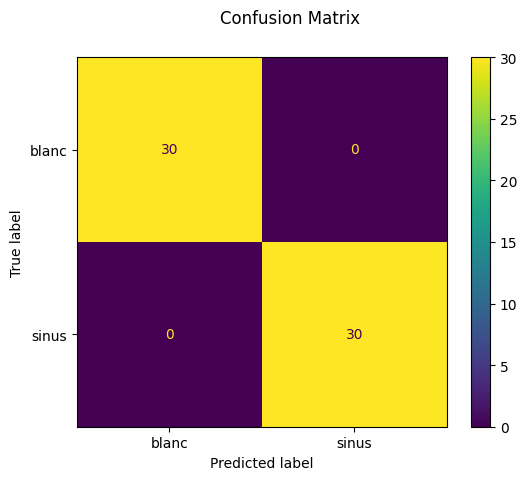

In [21]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matrice de confusion:\n{disp.confusion_matrix}")